# Lab 2 - Sorting

In second lab session, we implement insertion sort and merge sort algorithms using Python programming language. We test our implementations for various arrays using `unittest` library of Python. After testing, we also compute time for arrays of different lengths and plot the graph to analyze the time complexity of these algorithms. To plot the graph, we use `matplotlib` library of Python.

---

## Implementation of insertion sort and merge sort

The dependencies are imported as follows:

In [1]:
import unittest
import time
import matplotlib.pyplot as plt
import numpy as np

---

### Insertion Sort

The basic idea of inserion sort is that the array is virtually split in two parts: sorted and unsorted part. Values of the unsorted part of array are picked one by one and placd in the correct position of the sorted part.

The implementation of insertion sort is

In [2]:
def insertion_sort(A:list) -> None:
    '''
    Pick each value from list A from index j (1...len(A)) and place it in correct position in index [0...j]
    '''
    
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        time.sleep(10**-6)
        while i >= 0 and A[i] > key:
            A[i+1] = A[i]
            i = i - 1
        A[i+1] = key

<br/>

### Merge Sort

Merge Sort is a <mark> Divide and Conquer algorithm </mark>. In this algorithm , the array are divided into two almost equal halves, call itself for those two halves and merges the two sorted halves.

The `merge()` function is used to merge two halves.

The implementation of merge sort in python is as follows:

In [3]:
def merge(A, p, q, r):
    '''
    Sort and merge two parts of array A
    '''
    
    # Copy data from A in two arrays L and R with values from p to q in L and q+1 to r in R.
    L = A[p:q+1]
    R = A[q+1:r+1]
    
    # Initialize two pointers i and j. i points for left array L and j for right array R.
    i = j = 0
    
    # For each position k in array A, find the suitable value from L or R and place it in kth position of A.
    for k in range(p, r+1):
        # Check if both pointers i and j are less than the length of L and R respectively.
        if i < len(L) and j < len(R):
            if L[i] < R[j]:
                    A[k] = L[i]
                    i = i + 1
            else:
                A[k] = R[j]
                j = j + 1
        
        # Check if pointer i is less than the length of array L.
        elif i < len(L):
            A[k] = L[i]
            i = i + 1
            
        # heck if pointer  is less than the legth of array R.
        elif j < len(R):
            A[k] = R[j]
            j = j + 1


In [4]:
def merge_sort(A,p,r):
    '''
    Find the mid index of A[p..r] and recursively call itself and finally merge the sorted arrays.
    '''
    if p < r:
        q = (p + r) // 2
        merge_sort(A, p, q)
        merge_sort(A, q+1, r)
        merge(A, p, q, r)

---

## Test Cases for insertion and merge sort

The `unittest` standard library of python3 was used for testing the insertion and merge sort functions.

The test case of <mark>insertion sort</mark> is as follows:

In [5]:
class InsertionSortTest(unittest.TestCase):
    def runTest(self):
        A = [2,3,1,5,6,4]   # test for unsorted list
        B = [1,2,3,4,5,6]   # test for sorted list
        C = [6,5,4,3,2,1]   # test for reverse sorted list

        sortList = [1,2,3,4,5,6]
        insertion_sort(A)
        insertion_sort(B)
        insertion_sort(C)
        self.assertListEqual(A, sortList)
        self.assertListEqual(B, sortList)
        self.assertListEqual(C, sortList)

The test case of <mark> merge sort </mark> is as follows:

In [6]:
class MergeSortTest(unittest.TestCase):
    def runTest(self):
        A = [2,3,1,5,6,4]   # test for unsorted list
        B = [1,2,3,4,5,6]   # test for sorted list
        C = [6,5,4,3,2,1]   # test for reverse sorted list

        sortList = [1,2,3,4,5,6]
        merge_sort(A, 0, 5)
        merge_sort(B, 0, 5)
        merge_sort(C, 0, 5)

        self.assertListEqual(A, sortList)
        self.assertListEqual(B, sortList)
        self.assertListEqual(C, sortList)

To run the test in jupyter notebook, following command is run:

In [7]:
unittest.main(argv=[''], verbosity=2, exit=False)

runTest (__main__.InsertionSortTest) ... ok
runTest (__main__.MergeSortTest) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.011s

OK


The output shows that the test for both merge and insertion sort is **OK**.

---

## Time Complexity

To find the time complexity, we plot the length of array vs time using `matplotlib` library. 

In this section, time complexity of best case and worst case of both sort algorithms were calculated.

### Insertion Sort

In [8]:
x_axis_is = range(10, 1000, 10)

The <mark>best case</mark> of insertion sort occurs when the array is already sorted.

In [9]:
y_is_bc = []
for x in x_axis_is:
    values = list(range(x))
    start_time = time.time()
    insertion_sort(values)
    end_time = time.time()
    y_is_bc.append((end_time-start_time)*10**6)

The <mark>worst case</mark> occurs when the array is sorted in reverse order.

In [10]:
y_is_wc = []
for x in x_axis_is:
    values = list(reversed(range(x)))
    start_time = time.time()
    insertion_sort(values)
    end_time = time.time()
    y_is_wc.append((end_time-start_time)*10**6)

<br/>

### Merge Sort

In [11]:
x_axis_ms = range(100, 10000, 100)

The <mark>best case</mark> of merge sort occurs when the array is already sorted.

In [12]:
y_ms_bc = []
for x in x_axis_ms:
    values = list(range(x))
    start_time = time.time()
    merge_sort(values, 0, x-1)
    end_time = time.time()
    y_ms_bc.append((end_time-start_time)*10**6)

The <mark>worst case</mark> occurs when the array is sorted in reverse order.

In [13]:
y_ms_wc = []
for x in x_axis_ms:
    values = list(reversed(range(x)))
    start_time = time.time()
    merge_sort(values, 0, x-1)
    end_time = time.time()
    y_ms_wc.append((end_time-start_time)*10**6)

___

### Plotting Length vs Time

Finally, using `matplotlib`, the garph of length of array (n) versus time required are plotted.

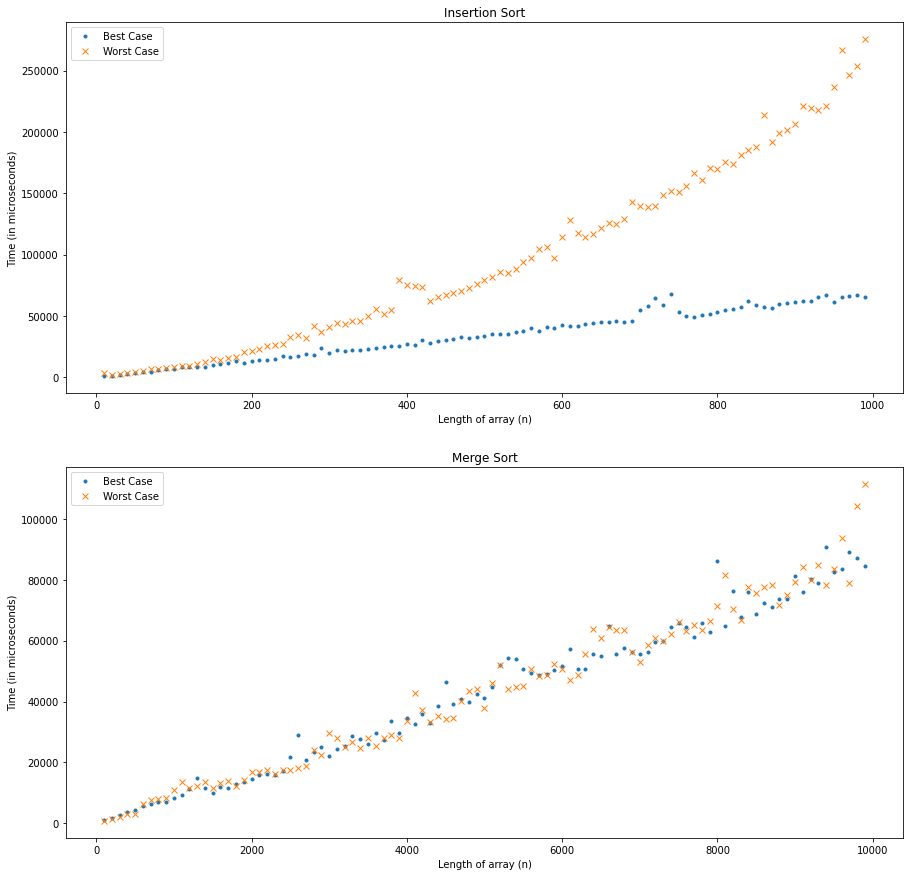

In [14]:
fig, (insertion_plt, merge_plt) = plt.subplots(nrows=2, figsize=(15,15))

insertion_plt.plot(x_axis_is, y_is_bc, '.', label='Best Case')
insertion_plt.plot(x_axis_is, y_is_wc, 'x', label='Worst Case')

insertion_plt.set_xlabel("Length of array (n)")
insertion_plt.set_ylabel("Time (in microseconds)")
insertion_plt.set_title("Insertion Sort")
insertion_plt.legend()

merge_plt.plot(x_axis_ms, y_ms_bc, '.', label='Best Case')
merge_plt.plot(x_axis_ms, y_ms_wc, 'x', label='Worst Case')

merge_plt.set_xlabel("Length of array (n)")
merge_plt.set_ylabel("Time (in microseconds)")
merge_plt.set_title("Merge Sort")
merge_plt.legend()


plt.show()